# Notebook 1 - Introdução ao problema

O objetivo é usar os dados de empréstimos para construir um modelo que possa identificar corretamente os inadimplentes(verdadeiros positivos) para que o clube de crédito possa decidir se uma pessoa está apta a obter um empréstimo ou não no futuro.

Este problema é uma classificação binária, pois tenho apenas duas classes para prever.

# 0 - Importando as Libs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime as dt
from datetime import datetime
%matplotlib inline



sns.set(style="whitegrid")
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)
pd.options.mode.chained_assignment = None
pd.options.display.float_format = '{:.2f}'.format
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 400)

## Funções úteis

In [2]:
def drop_cols(df, cols):
    df.drop(cols, axis=1, inplace=True)

# 1 - Importando a base

In [3]:
df1 = pd.read_csv('../__data/loan_2007_2018.csv', parse_dates=False)

In [4]:
print("Este dataset contém {} linhas e {} colunas".format(df1.shape[0],df1.shape[1]))
df1.head()

Este dataset contém 2260701 linhas e 151 colunas


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.00,3600.00,3600.00,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.00,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.00,Aug-2003,675.00,679.00,1.00,30.00,NaN,7.00,0.00,2765.00,29.70,13.00,w,0.00,0.00,4421.72,4421.72,3600.00,821.72,0.00,0.00,0.00,Jan-2019,122.67,NaN,Mar-2019,564.00,560.00,0.00,30.00,1.00,Individual,NaN,NaN,NaN,0.00,722.00,144904.00,2.00,2.00,0.00,1.00,21.00,4981.00,36.00,3.00,3.00,722.00,34.00,9300.00,3.00,1.00,4.00,4.00,20701.00,1506.00,37.20,0.00,0.00,148.00,128.00,3.00,3.00,1.00,4.00,69.00,4.00,69.00,2.00,2.00,4.00,2.00,5.00,3.00,4.00,9.00,4.00,7.00,0.00,0.00,0.00,3.00,76.90,0.00,0.00,0.00,178050.00,7746.00,2400.00,13734.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.00,24700.00,24700.00,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.00,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.00,Dec-1999,715.00,719.00,4.00,6.00,NaN,22.00,0.00,21470.00,19.20,38.00,w,0.00,0.00,25679.66,25679.66,24700.00,979.66,0.00,0.00,0.00,Jun-2016,926.35,NaN,Mar-2019,699.00,695.00,0.00,NaN,1.00,Individual,NaN,NaN,NaN,0.00,0.00,204396.00,1.00,1.00,0.00,1.00,19.00,18005.00,73.00,2.00,3.00,6472.00,29.00,111800.00,0.00,0.00,6.00,4.00,9733.00,57830.00,27.10,0.00,0.00,113.00,192.00,2.00,2.00,4.00,2.00,NaN,0.00,6.00,0.00,5.00,

# 2 - Feature Selection (Filtros)

## 2.1 Variáveis 100% constantes

In [5]:
df2 = df1.copy()

In [6]:
cols_to_remove = []

for col in df2.columns:
    
    if( df2[col].nunique() == 1):
        cols_to_remove.append(col)

In [7]:
cols_to_remove

['policy_code', 'hardship_type', 'deferral_term', 'hardship_length']

In [8]:
drop_cols(df2, cols_to_remove)

In [9]:
df2.shape

(2260701, 147)

## 2.2 Variáveis com 50% de missings

In [10]:
df3 = df2.copy()

In [11]:
( df3.isnull().sum() / df3.shape[0] ).sort_values( ascending = False ).tolist()

[1.0,
 0.9961733108447336,
 0.9951709668815115,
 0.9951709668815115,
 0.9951709668815115,
 0.9951709668815115,
 0.9951709668815115,
 0.9951709668815115,
 0.9951709668815115,
 0.9951709668815115,
 0.9951709668815115,
 0.9951709668815115,
 0.9848516013395845,
 0.9848516013395845,
 0.9848516013395845,
 0.9848516013395845,
 0.9848516013395845,
 0.9848516013395845,
 0.9841013915595207,
 0.9530304980623266,
 0.9522183605881539,
 0.9522179182474817,
 0.9522179182474817,
 0.9522179182474817,
 0.9522179182474817,
 0.9522179182474817,
 0.9522179182474817,
 0.9522179182474817,
 0.9522179182474817,
 0.9522179182474817,
 0.9522179182474817,
 0.9488079140054346,
 0.9466068268205304,
 0.9466050574578416,
 0.9442354384768264,
 0.8411306935326698,
 0.7701151103131285,
 0.7430995960987322,
 0.6725091022651823,
 0.595099926969555,
 0.5124671506758302,
 0.47281042473109003,
 0.40251099105985266,
 0.3832355539277419,
 0.3831391236612007,
 0.3831391236612007,
 0.3831391236612007,
 0.3831386813205285,
 0.383

In [12]:
for i in np.arange(0, 105, 10):
    print(
    "Mantendo features com no máx " + str(i) + "% de missings: restam " + str(np.sum(100*(df3.isnull().sum() / df3.shape[0]) <= i)) + " features")

Mantendo features com no máx 0% de missings: restam 1 features
Mantendo features com no máx 10% de missings: restam 91 features
Mantendo features com no máx 20% de missings: restam 92 features
Mantendo features com no máx 30% de missings: restam 92 features
Mantendo features com no máx 40% de missings: restam 104 features
Mantendo features com no máx 50% de missings: restam 106 features
Mantendo features com no máx 60% de missings: restam 108 features
Mantendo features com no máx 70% de missings: restam 109 features
Mantendo features com no máx 80% de missings: restam 111 features
Mantendo features com no máx 90% de missings: restam 112 features
Mantendo features com no máx 100% de missings: restam 147 features


In [13]:
df_missings = df3.isnull().mean()
cols_to_remove2 = sorted(df_missings[ df_missings > 0.48 ].index)

In [14]:
len(cols_to_remove2)

41

In [15]:
drop_cols(df3, cols_to_remove2)

In [16]:
df3.shape

(2260701, 106)

## 2.3 Removendo dados "vazados" 

Removendo os recursos que não estavam disponíveis antes de aceitar um empréstimo.

In [17]:
df4 = df3.copy()

In [18]:
df4.columns.tolist()

['id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'application_type',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util

In [19]:
#drop_list = ['acc_now_delinq', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'debt_settlement_flag', 'delinq_2yrs', 'delinq_amnt', 'disbursement_method', 'funded_amnt', 'funded_amnt_inv', 'hardship_flag', 'inq_last_6mths', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'last_pymnt_amnt', 'last_pymnt_d', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',  'out_prncp', 'out_prncp_inv', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pymnt_plan', 'recoveries', 'tax_liens', 'tot_coll_amt', 'tot_cur_bal', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp', 'total_rev_hi_lim', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m']
cols_to_remove3 = [
    'acc_now_delinq', 
    'acc_open_past_24mths', 
    'avg_cur_bal', 
    'bc_open_to_buy', 
    'bc_util', 
    'chargeoff_within_12_mths', 
    'collection_recovery_fee', 
    'collections_12_mths_ex_med', 
    'debt_settlement_flag', 
    'delinq_2yrs', 
    'delinq_amnt', 
    'disbursement_method', 
    'funded_amnt', 
    'funded_amnt_inv', 
    'hardship_flag', 
    'inq_last_6mths', 
    'last_credit_pull_d', 
    'last_fico_range_high', 
    'last_fico_range_low',
    'last_pymnt_amnt',
    'last_pymnt_d', 
    'mo_sin_rcnt_rev_tl_op', 
    'mo_sin_rcnt_tl', 
    'mths_since_recent_bc', 
    'mths_since_recent_inq',
    'num_accts_ever_120_pd', 
    'num_actv_bc_tl', 
    'num_actv_rev_tl', 
    'num_bc_sats', 
    'num_bc_tl', 
    'num_il_tl', 
    'num_op_rev_tl', 
    'num_rev_accts', 
    'num_rev_tl_bal_gt_0', 
    'num_sats', 
    'num_tl_120dpd_2m', 
    'num_tl_30dpd', 
    'num_tl_90g_dpd_24m', 
    'num_tl_op_past_12m',  
    'out_prncp', 
    'out_prncp_inv', 
    'pct_tl_nvr_dlq', 
    'percent_bc_gt_75',
    'pymnt_plan', 
    'recoveries', 
    'tax_liens', 
    'tot_coll_amt', 
    'tot_cur_bal', 
    'tot_hi_cred_lim', 
    'total_bal_ex_mort', 
    'total_bc_limit', 
    'total_il_high_credit_limit', 
    'total_pymnt', 
    'total_pymnt_inv', 
    'total_rec_int', 
    'total_rec_late_fee', 
    'total_rec_prncp', 
    'total_rev_hi_lim']

In [20]:
len(cols_to_remove3)

58

In [21]:
drop_cols(df4, cols_to_remove3)

In [22]:
len(df4.columns)

48

In [23]:
df4.shape

(2260701, 48)

In [24]:
# 2.3 "Binando" variáveis contínuas:

In [25]:
# df5 = df4.copy()

In [26]:
# # criando bins para loan_amnt range
# bins = [0, 5000, 10000, 15000, 20000, 25000, 36000]
# bucket_l = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000+']
# df5['loan_amnt_range'] = pd.cut(df5['loan_amnt'], bins, labels=bucket_l)

# # criando bins para int_rate range
# bins = [0, 7.5, 10, 12.5, 15, 100]
# bucket_l = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15+']
# df5['int_rate_range'] = pd.cut(df5['int_rate'], bins, labels=bucket_l)

# # criando bins para annual_inc range
# bins = [0, 25000, 50000, 75000, 100000, 1000000]
# bucket_l = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000+']
# df5['annual_inc_range'] = pd.cut(df5['annual_inc'], bins, labels=bucket_l)

# # criando bins para installment range

# def installment(n):
#     if n <= 200:
#         return 'low'
#     elif n > 200 and n <=500:
#         return 'medium'
#     elif n > 500 and n <=800:
#         return 'high'
#     else:
#         return 'very high'

# df5['installment'] = df5['installment'].apply(lambda x: installment(x))

# # criando bins para dti range
# bins = [-1, 5.00, 10.00, 15.00, 20.00, 25.00, 50.00]
# bucket_l = ['0-5%', '5-10%', '10-15%', '15-20%', '20-25%', '25%+']
# df5['dti_range'] = pd.cut(df5['dti'], bins, labels=bucket_l)


In [27]:
# df5[[
#     'loan_amnt', 'loan_amnt_range','int_rate','int_rate_range',
#     'annual_inc', 'annual_inc_range','installment','dti','dti_range'
# ]].head()

In [28]:
# df5.shape

## 2.4 - Selecionando uma safra mais recente (2016-2018)

In [29]:
df5 = df4.copy()

In [30]:
df5['issue_d'].value_counts(dropna=False)

Mar-2016    61992
Oct-2015    48631
May-2018    46311
Oct-2018    46305
Aug-2018    46079
            ...  
Jul-2007       63
Sep-2008       57
Sep-2007       53
NaN            33
Jun-2007       24
Name: issue_d, Length: 140, dtype: int64

In [31]:
df5['issue_d'].fillna("sem_info")

0          Dec-2015
1          Dec-2015
2          Dec-2015
3          Dec-2015
4          Dec-2015
             ...   
2260696    Oct-2016
2260697    Oct-2016
2260698    Oct-2016
2260699    sem_info
2260700    sem_info
Name: issue_d, Length: 2260701, dtype: object

In [32]:
df5['issue_d'] = df5['issue_d'].astype('datetime64[ns]')

In [33]:
df5['issue_d'].value_counts()

2016-03-01    61992
2015-10-01    48631
2018-05-01    46311
2018-10-01    46305
2018-08-01    46079
              ...  
2007-08-01       74
2007-07-01       63
2008-09-01       57
2007-09-01       53
2007-06-01       24
Name: issue_d, Length: 139, dtype: int64

In [34]:
df5['issue_d'].max()

Timestamp('2018-12-01 00:00:00')

In [54]:
df5 = df5.loc[
    (df5['issue_d'] > '2015-12-01') & (df5['issue_d'] <= "2018-12-01")
]

In [55]:
df5.shape

(1373228, 48)

## 2.5 - Arrumando a variável Target

In [56]:
df6 = df5.copy()

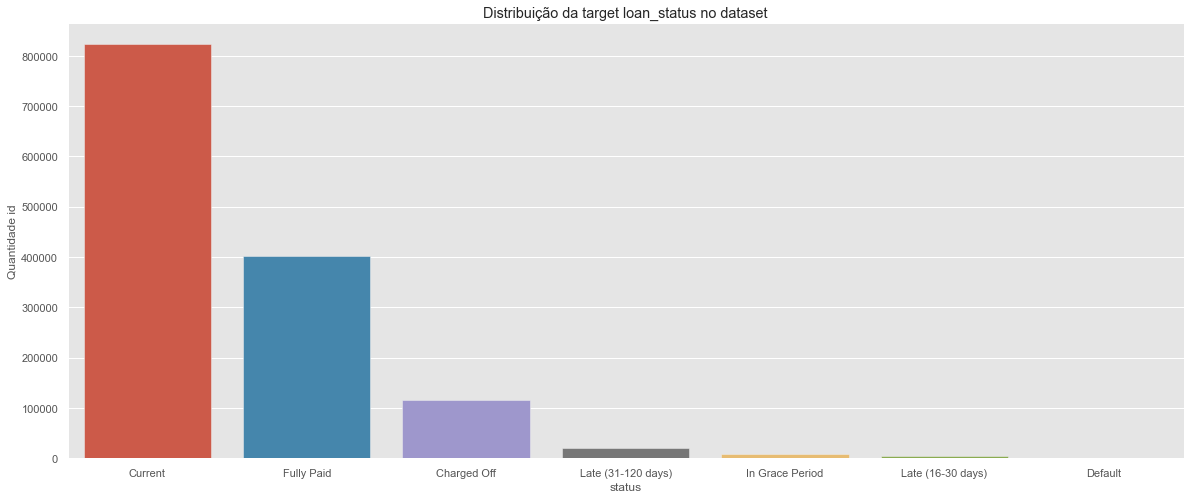

In [57]:
target = df6[ 'loan_status' ].value_counts()
target = target.to_frame()
target.reset_index( inplace = True )
target.columns = [ 'Loan Status','Count' ]


plt.subplots(figsize=(20,8))
sns.barplot(y = 'Count', x = 'Loan Status', data = target)
plt.xlabel("status")
plt.ylabel("Quantidade id")
plt.title("Distribuição da target loan_status no dataset")
plt.show()

- Default bem inferior às categorias Current (ativo) e Fully Paid (pago/encerrado) => dataset desbalanceado

In [58]:
# Selecionando 3 categorias do loan_status
df6 = df6.loc[df6['loan_status'].isin(['Fully Paid','Default','Charged Off'])]

In [59]:
# mergeando Default com Charged Off
df6['loan_status'] = df6['loan_status'].replace({'Charged Off':'Default'})
df6['loan_status'].value_counts()

Fully Paid    402449
Default       116295
Name: loan_status, dtype: int64

In [60]:
df6['loan_status'].value_counts(normalize=True, dropna=False)

Fully Paid   0.78
Default      0.22
Name: loan_status, dtype: float64

In [61]:
# criando dummy
df6['loan_status'] = df6['loan_status'].map({'Fully Paid': 0,'Default': 1})

In [62]:
df6.shape

(518744, 48)

# 3 - Salvando dados mais limpos

In [63]:
df7 = df6.copy()

In [64]:
df7.dtypes

id                              object
loan_amnt                      float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                      int64
url                             object
purpose                         object
title                           object
zip_code                        object
addr_state                      object
dti                            float64
earliest_cr_line                object
fico_range_low                 float64
fico_range_high                float64
open_acc                       float64
pub_rec                        float64
revol_bal                

In [66]:
print(df7.shape)
df7.head()

(518744, 48)


,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,title,zip_code,addr_state,dti,earliest_cr_line,fico_range_low,fico_range_high,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,inq_fi,total_cu_tl,inq_last_12m,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mort_acc,pub_rec_bankruptcies
421101,130956066,3000.00,36 months,7.34,93.10,A,A4,Scale Technician,9 years,RENT,52000.00,Source Verified,2018-03-01,0,https://lendingclub.com/browse/loanDetail.acti...,major_purchase,Major purchase,988xx,WA,0.58,Jan-1998,760.00,764.00,7.00,0.00,141.00,0.50,30.00,w,Individual,0.00,0.00,1.00,2.00,7.00,0.00,NaN,0.00,1.00,141.00,1.00,1.00,2.00,2.00,132.00,242.00,4.00,0.00
421113,130968727,5000.00,36 months,11.98,166.03,B,B5,SDO Supervisor,10+ years,OWN,55000.00,Not Verified,2018-03-01,0,https://lendingclub.com/browse/loanDetail.acti...,other,Other,300xx,GA,14.18,Aug-2001,675.00,679.00,14.00,1.00,11449.00,33.90,24.00,w,Individual,1.00,1.00,0.00,0.00,33.00,17431.00,63.00,2.00,2.00,4829.00,47.00,0.00,1.00,1.00,77.00,199.00,0.00,1.00
421120,130910225,7000.00,36 months,11.98,232.44,B,B5,Parole,< 1 year,MORTGAGE,40000.00,Verified,2018-03-01,0,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,Home improvement,797xx,TX,20.25,Mar-2007,695.00,699.00,13.00,0.00,5004.00,36.00,29.00,w,Individual,1.00,6.00,0.00,2.00,16.00,126722.00,102.00,2.00,2.00,3944.00,90.00,2.00,1.00,4.00,122.00,132.00,0.00,0.00
421135,130966492,30000.00,36 months,21.85,1143.39,D,D5,teacher,10+ years,OWN,57000.00,Verified,2018-03-01,0,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,341xx,FL,27.58,Apr-2000,680.00,684.00,11.00,0.00,29222.00,53.20,26.00,w,Individual,1.00,1.00,2.00,2.00,6.00,33030.00,94.00,2.00,2.00,6236.00,69.00,2.00,8.00,5.00,195.00,215.00,2.00,0.00
421137,130942737,21000.00,60 months,20.39,560.94,D,D4,Machine operator,10+ years,OWN,85000.00,Source Verified,2018-03-01,0,https://lendingclub.com/browse/loanDetail.acti...,house,Home buying,135xx,NY,15.76,Nov-2008,665.00,669.00,15.00,0.00,14591.00,34.20,27.00,w,Individual,1.00,1.00,2.00,2.00,7.00,37076.00,NaN,2.00,5.00,5354.00,34.00,6.00,4.00,13.00,67.00,112.00,3.00,0.00


In [47]:
#df7.to_csv('lending_club_cleaned.csv', index=None)

# Fim notebook 1